# Command: A new tool for building multi-agent architectures in LangGraph


Building agentic and multi-agent systems is all about communication.

Now, nodes can dynamically decide which node to execute next, improving flexibility and simplifying complex workflows.

#### **What's New:**
- **Edgeless graphs:** Nodes no longer need edges to connect. Instead, they can directly specify which node to go to next, making your agent flows more intuitive and adaptable.

- **Enhanced control:** Control the flow after the state update by returning a Command that points to the next node, enabling dynamic, real-time decision-making.

- **Edgeless graphs:** Nodes no longer need edges to connect. Instead, they can directly specify which node to go to next, making your agent flows more intuitive and adaptable.


In [1]:
%%capture --no-stderr
%pip install -U langgraph

Let's learn it with a simple example - An
AI-powered home search engine like: https://flyhomes.com/.


## S1: Understand Command Basic Usage

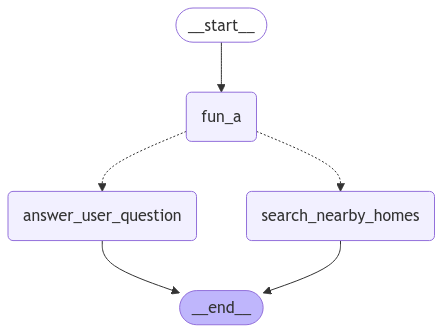

search_nearby_homes
resp{'messages': [], 'address': 'Sialkot,Pakistan'}


In [40]:
from typing import Literal,Dict
from langchain_core.messages import AIMessage
from langgraph.graph import StateGraph,START,END
from langgraph.types import Command
import random
from typing import Annotated,Dict,Optional,TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]
    address:str
    nearby_homes:Optional[list[Dict]]

def fun_a(state:State)->Command[Literal["search_nearby_homes","answer_user_question"]]:
    current_value = random.choice(["search_nearby_homes","answer_user_question"])
    print(current_value)
    if current_value == "answer_user_question":
        goto = "answer_user_question"
    else:
        goto = "search_nearby_homes"
    return Command(goto=goto,
                   )
def search_nearby_homes(state:State):
    return {'search_nearby':[{"home_1":"arman", "home_2":"usman",}]}
def answer_user_question(state:State):
    return {"messages":[AIMessage(content="please try again later")]}
builder = StateGraph(State)
builder.add_node(fun_a)
builder.add_node( search_nearby_homes)
builder.add_node( answer_user_question)
builder.add_edge(START,"fun_a")
builder.add_edge("search_nearby_homes",END)
builder.add_edge("answer_user_question",END)
from IPython.display import display,Image
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))
resp = graph.invoke({"address": "Sialkot,Pakistan"})
print(f"resp{resp}")


## S2: Update State using Command

After node_1 we can update our state as well. So if user is already in our system we can add it's user data in the stage to personalize user experience.

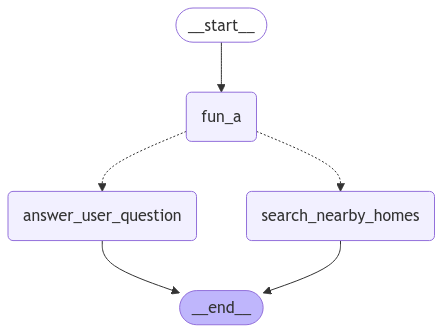

In [61]:
from typing import Literal,Dict
from langchain_core.messages import AIMessage
from langgraph.graph import StateGraph,START,END
from langgraph.types import Command
import random
from typing import Annotated,Dict,Optional,TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]
    address:str
    nearby_homes:Optional[list[Dict]]
    user_data:Optional[Dict]

def fun_a(state:State)->Command[Literal["search_nearby_homes","answer_user_question"]]:
    current_value = random.choice(["search_nearby_homes","answer_user_question"])
    mock_user_info = {"name":"Arman Muhammad Ashraf"}

    if current_value == "search_nearby_homes":
        goto = "search_nearby_homes"
    else:
        goto = "answer_user_question"
    return Command(goto=goto,
                   update={"user_data":mock_user_info}
                   )
def search_nearby_homes(state:State):
    print(state["user_data"]['name'])
    return {'nearby_homes':[{"home_1":"arman", "home_2":"usman"}]}
def answer_user_question(state:State):
    print(state["user_data"]['name'])
    user_name = state["user_data"].get("name", "Guest")
    return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}
builder = StateGraph(State)
builder.add_node(fun_a)
builder.add_node( search_nearby_homes)
builder.add_node( answer_user_question)
builder.add_edge(START,"fun_a")
builder.add_edge("search_nearby_homes",END)
builder.add_edge("answer_user_question",END)
from IPython.display import display,Image
graph1 = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [62]:
resp = graph1.invoke({"address": "Sialkot,Pakistan"})
print(f"resp{resp}")

Arman Muhammad Ashraf
resp{'messages': [AIMessage(content='Hi, Arman Muhammad Ashraf Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='7452a34a-48e7-4f2e-ace1-1f87f7264d53')], 'address': 'Sialkot,Pakistan', 'user_data': {'name': 'Arman Muhammad Ashraf'}}


In [63]:
resp = graph1.invoke({"address": "Sialkot,Pakistan"})
print(f"resp{resp}")

Arman Muhammad Ashraf
resp{'messages': [], 'address': 'Sialkot,Pakistan', 'nearby_homes': [{'home_1': 'arman', 'home_2': 'usman'}], 'user_data': {'name': 'Arman Muhammad Ashraf'}}


# S3: Run Nodes(Agents) in Parallel
Now our user requirement is to both find homes and have conversation with user.
For this:

- We shall call Both Nodes in Parrallel

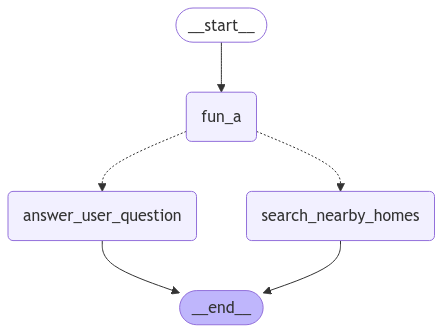

In [68]:
from typing import Literal,Dict
from langchain_core.messages import AIMessage
from langgraph.graph import StateGraph,START,END
from langgraph.types import Command
import random
from typing import Annotated,Dict,Optional,TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]
    address:str
    nearby_homes:Optional[list[Dict]]
    user_data:Optional[Dict]

def fun_a(state:State)->Command[Literal["search_nearby_homes","answer_user_question"]]:
    mock_user_info = {"name":"Arman Muhammad Ashraf"}
    return Command(goto=['search_nearby_homes','answer_user_question'],
                   update={"user_data":mock_user_info}
                   )
def search_nearby_homes(state:State):
    print(state["user_data"]['name'])
    return {'nearby_homes':[{"home_1":"arman", "home_2":"usman"}]}
def answer_user_question(state:State):
    print(state["user_data"]['name'])
    user_name = state["user_data"].get("name", "Guest")
    return {"messages": [AIMessage(content=f"Hi, {user_name} Welcome to Homes AI Search Engine")]}
builder = StateGraph(State)
builder.add_node(fun_a)
builder.add_node( search_nearby_homes)
builder.add_node( answer_user_question)
builder.add_edge(START,"fun_a")
builder.add_edge("search_nearby_homes",END)
builder.add_edge("answer_user_question",END)
from IPython.display import display,Image
graph1 = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [69]:
resp = graph1.invoke({"address": "Sialkot,Pakistan"})
print(f"resp{resp}")

Arman Muhammad Ashraf
Arman Muhammad Ashraf
resp{'messages': [AIMessage(content='Hi, Arman Muhammad Ashraf Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='ae05c07e-6c4f-40fd-a6c8-5a78baaef0d1')], 'address': 'Sialkot,Pakistan', 'nearby_homes': [{'home_1': 'arman', 'home_2': 'usman'}], 'user_data': {'name': 'Arman Muhammad Ashraf'}}


In [70]:
resp = graph1.invoke({"address": "lahore,Pakistan"})
print(f"resp{resp}")

Arman Muhammad Ashraf
Arman Muhammad Ashraf
resp{'messages': [AIMessage(content='Hi, Arman Muhammad Ashraf Welcome to Homes AI Search Engine', additional_kwargs={}, response_metadata={}, id='536d44cf-7cb5-4b37-88bd-914b9098f401')], 'address': 'lahore,Pakistan', 'nearby_homes': [{'home_1': 'arman', 'home_2': 'usman'}], 'user_data': {'name': 'Arman Muhammad Ashraf'}}


In [67]:
resp = graph1.invoke({"address": "Sialkot,Pakistan"})
print(f"resp{resp}")

Arman Muhammad Ashraf
resp{'messages': [], 'address': 'Sialkot,Pakistan', 'nearby_homes': [{'home_1': 'arman', 'home_2': 'usman'}], 'user_data': {'name': 'Arman Muhammad Ashraf'}}
